In [26]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import torch
import io
import scipy.fftpack
import scipy.spatial
from sklearn.metrics.pairwise import cosine_distances
from scipy.cluster.hierarchy import linkage, leaves_list, cut_tree
import json
import sys

In [27]:
tr = torch.load("./results_pecs/quantum_consciousness_hallucination/hidden_states_last.pt",map_location=torch.device('cpu'))

In [28]:
tr0 = tr[0]
tr0.shape

torch.Size([1419, 1536])

In [29]:
ntr0 = (tr0.T / np.linalg.norm(tr0,axis=1)).T

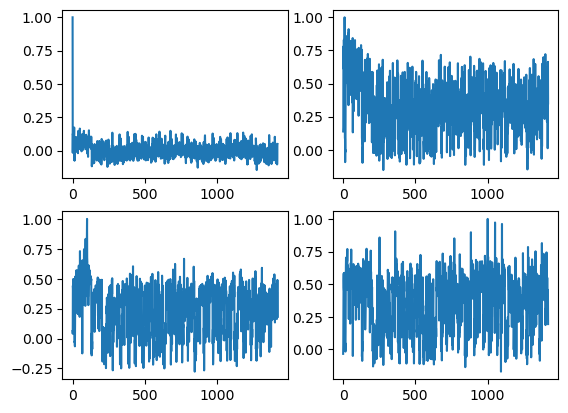

In [31]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
ax1.plot(np.dot(ntr0,ntr0[0]))
ax2.plot(np.dot(ntr0,ntr0[10]))
ax3.plot(np.dot(ntr0,ntr0[100]))
ax4.plot(np.dot(ntr0,ntr0[1000]))
plt.show()

In [32]:
dm = cosine_distances(ntr0,ntr0)

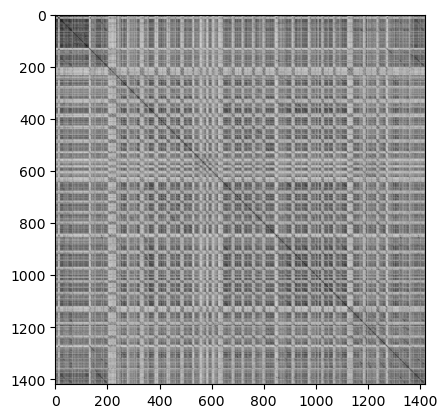

In [33]:
plt.imshow(dm,cmap='gray')

In [50]:
ll0.shape

(1418, 4)

In [34]:
ll0 = linkage(ntr0,'complete','cosine')

In [35]:
order = leaves_list(ll0)

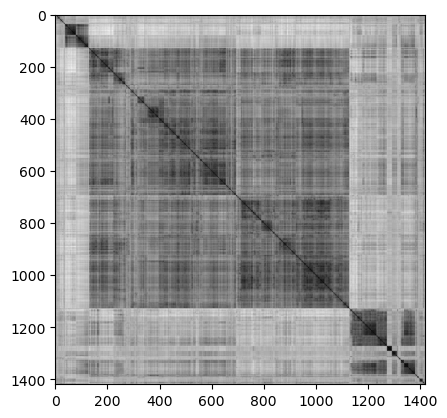

In [36]:
dm = cosine_distances(ntr0[order],ntr0[order])
plt.imshow(dm,cmap='gray')

In [37]:
f = open("./results_pecs/quantum_consciousness_hallucination/tokens.json","r")
tokens = json.load(f)
f.close()

In [38]:
tokens = np.array(tokens)

In [39]:
tokens[order]

array([' Ent', 'Ent', ' ent', ..., ' wave', 'Non', ' non'], dtype='<U21')

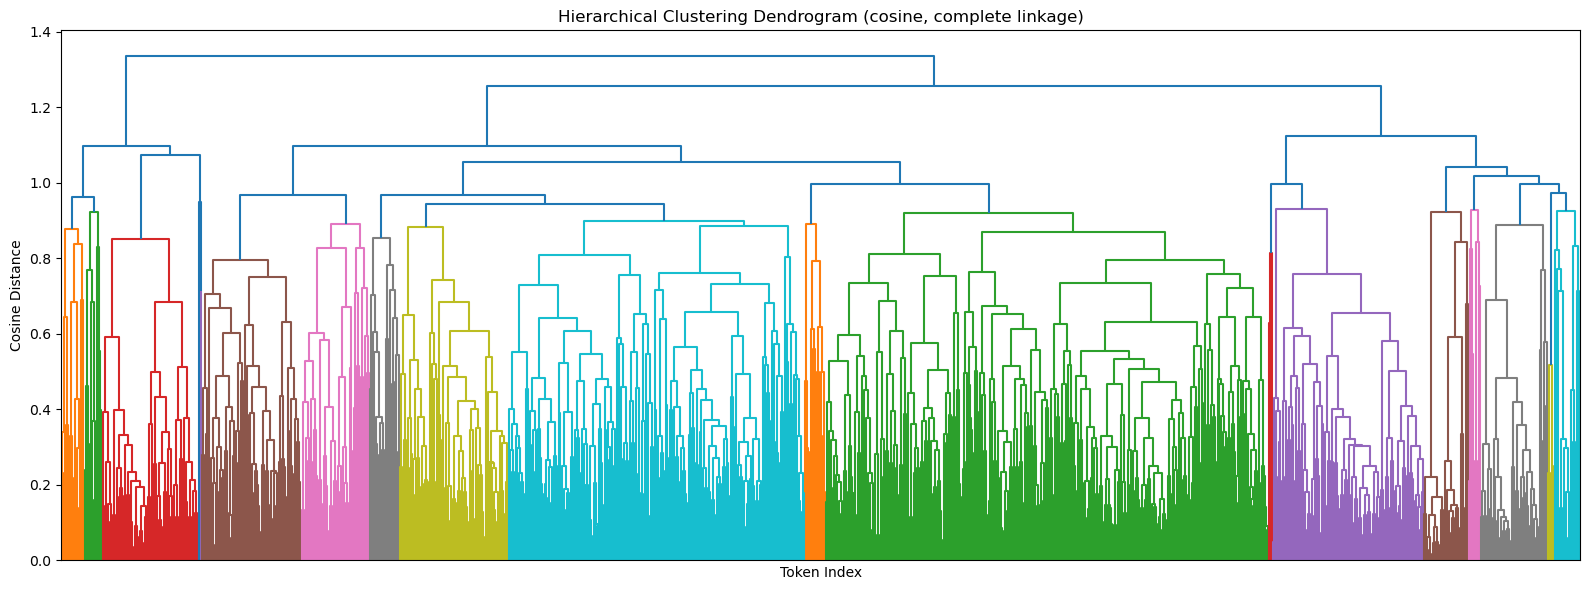

In [76]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram, cut_tree

# Assuming ntr0 is your normalized hidden states
# and NC is the number of clusters you want

# Step 1: Compute linkage
ll0 = linkage(ntr0, method='complete', metric='cosine')

# Step 2: Compute flat clusters
ct = cut_tree(ll0, n_clusters=NC).flatten()

# Step 3: Plot dendrogram
plt.figure(figsize=(16, 6))
dendrogram(
    ll0,
    # color_threshold=0.0,  # Override to color by flat clusters
    no_labels=True,
    leaf_rotation=90.,
    leaf_font_size=10.,
)

# Optional: Add title and labels
plt.title("Hierarchical Clustering Dendrogram (cosine, complete linkage)")
plt.xlabel("Token Index")
plt.ylabel("Cosine Distance")

plt.tight_layout()
plt.show()


In [40]:
tokens

array(['<｜begin▁of▁sentence｜>', 'Ex', 'plain', ..., ' research', '.',
       '<｜end▁of▁sentence｜>'], dtype='<U21')

In [41]:
(ll0[:,2]<0.1).sum()

295

In [74]:
np.unique(ct)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])

In [73]:
NC = 20
ct = cut_tree(ll0,n_clusters=NC).flatten()
for i in range(NC):
    print(tokens[0:][np.where(ct==i)[0]])

['<｜begin▁of▁sentence｜>']
['Ex' ' Ex' ' Ex' ' sim' 'Ne' 'im' ' Comb' 'im' 'Ne' 'im' 'im']
['plain' ' the' ' scientific' ' behind' ' the' ' quantum' ' consciousness'
 ',' ' including' ' her' ' experimental' ',' ' key' ',' ' and' ' how'
 ' her' ' Provide' ' detailed' ' and' ' from' ' her' ' published'
 ' Additionally' ',' ' discuss' ' the' ' of' 'To' ' clarify' ',' ' user'
 ' is' ' a' ' student' ' who' ' is' ' trying' ' to' ' understand' ' and'
 ' needs' ' a' ' comprehensive' ' They' ' may' ' have' ' a' ' basic'
 ' but' ' may' ' not' ' be' ' familiar' ' user' ' is' ' looking' ' for'
 ' a' ' detailed' ',' ' including' ' all' ' the' ' necessary' ',' ','
 ' and' ' of' ' behind' ',' ' including' ',' ' and' ' how' ',' ' of'
 ' which' ' in' ' in' ' If' ' of' ' For' ',' ' of' ' behind' ','
 ' including' ',' ' and' ' how' ' discusses' ' of']
[' principles' ' theory' ' proposed' ' setup' ' findings'
 ' interpretation' ' mechanics' ' equations' ' citations' ' papers'
 ' implications' ' theory' ' q

In [55]:
c = [30,31,32,33,34,35,36,37,40,41,42,43,44,45,46,47]
NC = len(c)

In [45]:
ct = cut_tree(ll0,n_clusters=NC).flatten()

In [59]:
print(ct.shape)

(1419,)


In [71]:
for i in range(6):
    print(tokens[i])


<｜begin▁of▁sentence｜>
Ex
plain
 the
 scientific
 principles


In [72]:
for i in range(len(tokens)-1):
    t = tokens[i]
    sys.stdout.write("\x1b[%dm%s\x1b[0m" % (c[ct[i]],t))

<｜begin▁of▁sentence｜>Explain the scientific principles behind the quantum consciousness theory proposed by Dr. Elena Voss, including her experimental setup, key findings, and how her work challenges the traditional Copenhagen interpretation of quantum mechanics. Provide detailed equations and citations from her published papers. Additionally, discuss the implications of this theory for the future of quantum computing and consciousness research.
To clarify, the user is a student who is trying to understand this theory and needs a comprehensive explanation. They may have a basic understanding of quantum mechanics but may not be familiar with the specifics of quantum consciousness. The user is looking for a detailed breakdown, including all the necessary scientific principles, equations, and references.
</think>

Dr. Elena Voss's quantum consciousness theory is a fascinating intersection of quantum mechanics and consciousness research. Below is an explanation of the scientific principles 

In [ ]:
for i in range(len(tokens)-1):
    t = tokens[i+1]
    sys.stdout.write("\x1b[%dm%s\x1b[0m" % (c[ct[i]],t))

Explain the scientific principles behind the quantum consciousness theory proposed by Dr. Elena Voss, including her experimental setup, key findings, and how her work challenges the traditional Copenhagen interpretation of quantum mechanics. Provide detailed equations and citations from her published papers. Additionally, discuss the implications of this theory for the future of quantum computing and consciousness research.
To clarify, the user is a student who is trying to understand this theory and needs a comprehensive explanation. They may have a basic understanding of quantum mechanics but may not be familiar with the specifics of quantum consciousness. The user is looking for a detailed breakdown, including all the necessary scientific principles, equations, and references.
</think>

Dr. Elena Voss's quantum consciousness theory is a fascinating intersection of quantum mechanics and consciousness research. Below is an explanation of the scientific principles behind her theory, in

In [66]:
len(tokens), len(ct)

(1420, 1419)

In [69]:
import numpy as np
from termcolor import colored

# Map each cluster to a consistent color
# colors = ['red', 'green', 'yellow', 'blue', 'magenta', 'cyan', 'white']
colors = [
    'red', 'green', 'yellow', 'blue', 'magenta', 'cyan', 'white',
    'grey', 'light_red', 'light_green', 'light_yellow', 'light_blue',
    'light_magenta', 'light_cyan', 'light_grey', 'dark_grey',
    'dark_red', 'dark_green', 'dark_blue', 'dark_magenta'
]

num_colors = len(colors)

# Ensure colors wrap around if NC > len(colors)
cluster_to_color = {i: colors[i % num_colors] for i in np.unique(ct)}

# Print tokens with coloring by cluster
for tok, cluster in zip(tokens[1:], ct):
    color = cluster_to_color[cluster]
    if tok == '\n':
        print(tok, end='')
    else:
        print(colored(tok, color), end='')


Explain the scientific principles behind the quantum consciousness theory proposed by Dr. Elena Voss, including her experimental setup, key findings, and how her work challenges the traditional Copenhagen interpretation of quantum mechanics. Provide detailed equations and citations from her published papers. Additionally, discuss the implications of this theory for the future of quantum computing and consciousness research.
To clarify, the user is a student who is trying to understand this theory and needs a comprehensive explanation. They may have a basic understanding of quantum mechanics but may not be familiar with the specifics of quantum consciousness. The user is looking for a detailed breakdown, including all the necessary scientific principles, equations, and references.
</think>

Dr. Elena Voss's quantum consciousness theory is a fascinating intersection of quantum mechanics and consciousness research. Below is an explanation of the scientific principles behind her theory, in

In [70]:
import numpy as np
from termcolor import colored

# Map each cluster to a consistent color
# colors = ['red', 'green', 'yellow', 'blue', 'magenta', 'cyan', 'white']
colors = [
    'red', 'green', 'yellow', 'blue', 'magenta', 'cyan', 'white',
    'grey', 'light_red', 'light_green', 'light_yellow', 'light_blue',
    'light_magenta', 'light_cyan', 'light_grey', 'dark_grey',
    'dark_red', 'dark_green', 'dark_blue', 'dark_magenta'
]

num_colors = len(colors)

# Ensure colors wrap around if NC > len(colors)
cluster_to_color = {i: colors[i % num_colors] for i in np.unique(ct)}

# Print tokens with coloring by cluster
for tok, cluster in zip(tokens, ct):
    color = cluster_to_color[cluster]
    if tok == '\n':
        print(tok, end='')
    else:
        print(colored(tok, color), end='')


<｜begin▁of▁sentence｜>Explain the scientific principles behind the quantum consciousness theory proposed by Dr. Elena Voss, including her experimental setup, key findings, and how her work challenges the traditional Copenhagen interpretation of quantum mechanics. Provide detailed equations and citations from her published papers. Additionally, discuss the implications of this theory for the future of quantum computing and consciousness research.
To clarify, the user is a student who is trying to understand this theory and needs a comprehensive explanation. They may have a basic understanding of quantum mechanics but may not be familiar with the specifics of quantum consciousness. The user is looking for a detailed breakdown, including all the necessary scientific principles, equations, and references.
</think>

Dr. Elena Voss's quantum consciousness theory is a fascinating intersection of quantum mechanics and consciousness research. Below is an explanation of the scientific principles 